# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Additional imports
from dotenv import find_dotenv
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\407491\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv(find_dotenv())
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin OR btc",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# How did the call to newsapi do?
# Print total number of articles returned
print(f"Bitcoin and BTC articles: {bitcoin_headlines['totalResults']}")

# Show info of first article
bitcoin_headlines["articles"][0]

Bitcoin and BTC articles: 7586


{'source': {'id': None, 'name': 'BeInCrypto'},
 'author': 'Nicholas Pongratz',
 'title': 'Bitcoin Mutual Fund Hits the Market as Crypto ETP Race Heats Up',
 'description': 'Maryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).',
 'url': 'https://beincrypto.com/bitcoin-mutual-fund-hits-the-market-as-crypto-etp-race-heats-up/',
 'urlToImage': 'https://assets.entrepreneur.com/providers/be-in-crypto/hero-image-be-in-crypto-378754.jpeg',
 'publishedAt': '2021-07-29T11:45:36Z',
 'content': 'This story originally appeared on be[IN]cryptoMaryland-based ProFunds is launching a publicly available mutual fund connected to the value of bitcoin (BTC).\r\nThe Bitcoin Strategy ProFund invests in b… [+1875 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum OR eth",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total number of articles returned
print(f"Ethereum and ETH articles: {ethereum_headlines['totalResults']}")

# Show info of  article
ethereum_headlines["articles"][0]

Ethereum and ETH articles: 2966


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [6]:
# Create function to take in a news "corpus"
# and return a DataFrame with sentiment scores
def create_sentiment_df(news):
    news_sentiment = []
    # Generate sentiment scores for each article
    for article in news["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            # Build up sentiment list for DataFrame creation
            news_sentiment.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu})
            
        except AttributeError:
            pass
  
    # Create the news sentiment scores DataFrame
    news_df = pd.DataFrame(news_sentiment)

    # Reorder DataFrame columns to make for better viewing pleasure
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    news_df = news_df[cols]

    return news_df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = create_sentiment_df(bitcoin_headlines)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.3400,0.079,0.000,0.921
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934
2,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
3,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
4,2021-07-08,Opinions expressed by Entrepreneur contributor...,-0.4497,0.043,0.096,0.861


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = create_sentiment_df(ethereum_headlines)
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
4,2021-07-16,ETHEREUM: THE INFINITE GARDEN is a “feature-le...,0.6486,0.175,0.000,0.825


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.098834,0.060170,0.033740,0.906080
std,0.399146,0.070748,0.058176,0.085264
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.058000,0.000000,0.000000,0.852500
50%,0.000000,0.047000,0.000000,0.920000
75%,0.411525,0.092000,0.066000,1.000000
max,0.883400,0.276000,0.287000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.136577,0.057040,0.023990,0.918960
std,0.367553,0.065824,0.049211,0.076559
min,-0.812600,0.000000,0.000000,0.714000
25%,0.000000,0.000000,0.000000,0.873000
50%,0.000000,0.050500,0.000000,0.930000
75%,0.401900,0.090000,0.008000,1.000000
max,0.840200,0.237000,0.249000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?  

**A**: The coin with the highest mean positive score is ***Bitcoin*** at **0.060170** vs 0.057040 (at the time of writing).

Q: Which coin had the highest compound score?

**A**: The coin with the highest compound score is ***Bitcoin*** at **0.883400** vs 0.840200 (at the time of writing).

Q. Which coin had the highest positive score?

**A**: The coin with the highest positive score is ***Bitcoin*** at **0.276000** vs 0.237000 (at the time of writing).

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_supp = {'said', 'basically', 'also', 'char', 'ha', 't'}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # and ... remove stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_supp)]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
# Init
tokens = []

# Iterate through each row of tokenised text
for text in bitcoin_df["text"]:
    tokens.append(tokenizer(text))

# Add the data to the DataFrame
bitcoin_df["tokens"] = tokens
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.3400,0.079,0.000,0.921,"[story, originally, appeared, beincryptomaryla..."
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934,"[august, min, readthis, article, wa, translate..."
2,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
3,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
4,2021-07-08,Opinions expressed by Entrepreneur contributor...,-0.4497,0.043,0.096,0.861,"[opinions, expressed, entrepreneur, contributo..."


In [15]:
# Create a new tokens column for Ethereum
# Init
tokens = []

# Iterate through each row of tokenised text
for text in ethereum_df["text"]:
    tokens.append(tokenizer(text))

# Add the data to the DataFrame
ethereum_df["tokens"] = tokens
ethereum_df.tail()

,date,text,compound,positive,negative,neutral,tokens
95,2021-07-15,The cryptocurrency bitcoin now uses up more el...,0.2732,0.063,0.000,0.937,"[cryptocurrency, bitcoin, us, electricity, yea..."
96,2021-07-17,Taktile creates software products that enable ...,0.5719,0.215,0.069,0.716,"[taktile, creates, software, product, enable, ..."
97,2021-08-01,"$12, $205, $450, $208, $330, $2350\r\nThe figu...",0.4019,0.070,0.000,0.930,"[figure, random, price, ethereums, july, marke..."
98,2021-07-16,I analyzed the top 50 landscape photographers ...,0.2023,0.055,0.000,0.945,"[analyzed, top, landscape, photographer, accou..."
99,2021-07-24,The sixth time is a charm for the Dow Jones In...,0.4019,0.074,0.000,0.926,"[sixth, time, charm, dow, jones, industrial, a..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [37]:
# !!! Note to lecturer(s) !!!
# I have interpretted, from what is being asked, that: -
#  - the N-grams could be for all text, i.e. across all articles
#    OR ... could be for each article
#  - the top 10 words for a particular coin, to me,
#    certainly means across all articles
#
# This is what I have therefore done,
#  - N-grams is per article and added to the DataFrame
#  - Top 10 is across all articles and displayed separately

# Create helper function to get bigrams per article
# and provide all tokens for "corpus" passed in
def process_tokens(corpus):
    bigrams = []
    tokens_all = []
    # Iterate through each row of text/tokens
    for text in corpus:
        # Generate bigrams for each article/row
        bigrams.append(list(ngrams(text, n=2)))

        # Build up list of all words passed to function
        for word in text:
            tokens_all.append(word)

    return bigrams, tokens_all

In [38]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams, btc_tokens = process_tokens(bitcoin_df["tokens"])

# Add the bitcoin bigrams to the DataFrame
bitcoin_df["bigrams"] = btc_bigrams
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens,bigrams
0,2021-07-29,This story originally appeared on be[IN]crypto...,0.3400,0.079,0.000,0.921,"[story, originally, appeared, beincryptomaryla...","[(story, originally), (originally, appeared), ..."
1,2021-08-06,"August\r\n6, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934,"[august, min, readthis, article, wa, translate...","[(august, min), (min, readthis), (readthis, ar..."
2,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar...","[(wife, started), (started, little), (little, ..."
3,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,...","[(like, dogecoin), (dogecoin, devotee), (devot..."
4,2021-07-08,Opinions expressed by Entrepreneur contributor...,-0.4497,0.043,0.096,0.861,"[opinions, expressed, entrepreneur, contributo...","[(opinions, expressed), (expressed, entreprene..."


In [19]:
# Generate the Ethereum N-grams where N=2
eth_bigrams, eth_tokens = process_tokens(ethereum_df["tokens"])

# Add the bitcoin bigrams to the DataFrame
ethereum_df["bigrams"] = eth_bigrams
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens,bigrams
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest...","[(many, blockchain), (blockchain, platform), (..."
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,...","[(blockchain, infrastructure), (infrastructure..."
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ...","[(retail, investor), (investor, grew), (grew, ..."
3,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, wa, founded, adfree, creator, network, ...","[(cent, wa), (wa, founded), (founded, adfree),..."
4,2021-07-16,ETHEREUM: THE INFINITE GARDEN is a “feature-le...,0.6486,0.175,0.000,0.825,"[ethereum, infinite, garden, featurelength, do...","[(ethereum, infinite), (infinite, garden), (ga..."


In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = dict(token_count(btc_tokens, 10))

# Show the Top 10 nicely
pd.DataFrame(list(btc_top_10.items()), columns=['word', 'count'])

,word,count
0,bitcoin,65
1,reuters,33
2,july,25
3,cryptocurrency,19
4,illustration,19
5,taken,18
6,seen,16
7,wa,13
8,may,13
9,currency,12


In [22]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = dict(token_count(eth_tokens, 10))

# Print the Top 10 nicely
pd.DataFrame(list(eth_top_10.items()), columns=['word', 'count'])

,word,count
0,ethereum,39
1,reuters,24
2,bitcoin,23
3,illustration,21
4,taken,20
5,june,18
6,cryptocurrencies,17
7,cryptocurrency,17
8,reutersdado,16
9,new,16


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [16.0, 11.0]

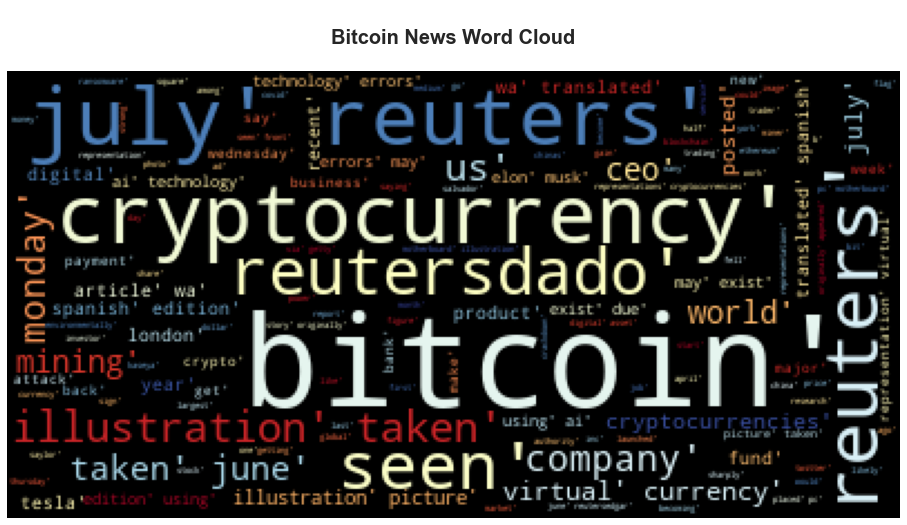

In [24]:
# Generate the Bitcoin word cloud
btc_wordcloud = WordCloud(colormap="RdYlBu").generate(str(btc_tokens))
plt.imshow(btc_wordcloud)

# Set some options
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("\nBitcoin News Word Cloud\n", fontdict=fontdict)

# Plot
plt.show()

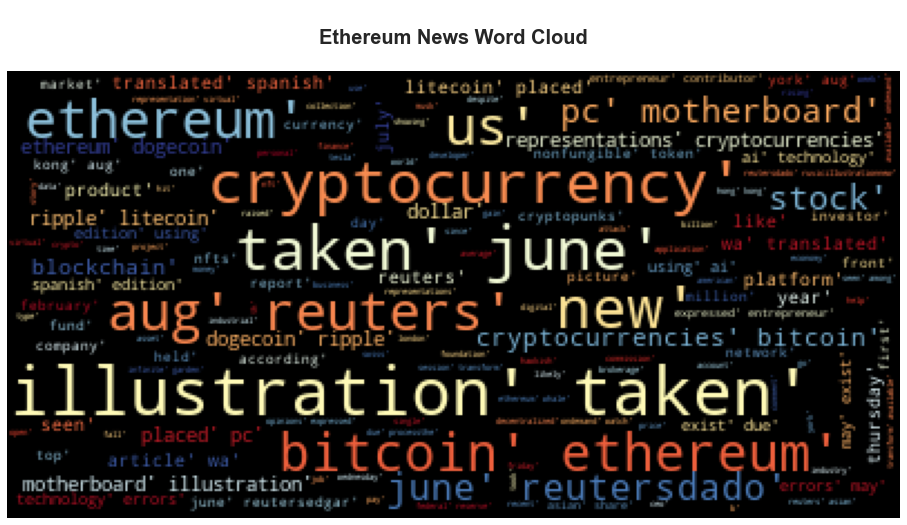

In [25]:
# Generate the Ethereum word cloud
eth_wordcloud = WordCloud(colormap="RdYlBu").generate(str(eth_tokens))
plt.imshow(eth_wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("\nEthereum News Word Cloud\n", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
btc_all_text = ''
for article in bitcoin_df["text"]:
    btc_all_text += ' ' + article

In [30]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_all_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER Visualisation with SpaCy"

# Change the colours for entities of type "person"
colors = {"PERSON": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

In [31]:
# Render the visualization
displacy.render(btc_doc, style="ent", options=options)

In [32]:
# List all Bitcoin Entities
# Build up the dict
btc_ent_list = []
for ent in btc_doc.ents:
    btc_ent_list.append({
              "SpaCy Entity": ent.text,
        "SpaCy Entity Label": ent.label_})

# List a sample of the entities nicely :)
pd.DataFrame(btc_ent_list)

,SpaCy Entity,SpaCy Entity Label
0,be[IN]cryptoMaryland,ORG
1,ProFunds,ORG
2,August,DATE
3,"6, 2021",DATE
4,Spanish,NORP
...,...,...
387,AI,ORG
388,one,CARDINAL
389,New York,GPE
390,Kaseya,PERSON


---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
eth_all_text = ''
for article in ethereum_df["text"]:
    eth_all_text += ' ' + article

In [39]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_all_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER Visualisation with SpaCy"

# Change the colours for entities of type "person"
colors = {"PERSON": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

In [40]:
# Render the visualization
displacy.render(eth_doc, style="ent", options=options)

In [41]:
# List all Ethereum Entities
eth_ent_list = []
for ent in eth_doc.ents:
    eth_ent_list.append({
              "SpaCy Entity": ent.text,
        "SpaCy Entity Label": ent.label_})

pd.DataFrame(eth_ent_list)

,SpaCy Entity,SpaCy Entity Label
0,Ethereum,PERSON
1,Ethereum Killers,WORK_OF_ART
2,Solana,PERSON
3,Bitcoin and Ethereum,ORG
4,2021,DATE
...,...,...
398,sixth,ORDINAL
399,"35,000",CARDINAL
400,first,ORDINAL
401,Friday,DATE


---